# Car Damage Detection using VGG16

In [51]:
import cv2
import numpy as np
import warnings
import keras,os
import pandas as pd

from keras.preprocessing.image import ImageDataGenerator
from keras.models import Model,Sequential
from keras.layers import Flatten,Dense,Input,Conv2D,MaxPooling2D,GlobalMaxPooling2D,GlobalAveragePooling2D, MaxPool2D
from keras.preprocessing import image
from keras.utils import layer_utils
from keras.utils.data_utils import get_file
from keras import backend as K
from keras.applications.vgg16 import VGG16,preprocess_input, decode_predictions
from keras.engine.topology import get_source_inputs

import matplotlib.pyplot as plt  # doctest: +SKIP
from matplotlib.colors import ListedColormap
from sklearn.metrics import confusion_matrix

## Path to VGG16 weights

In [52]:
model_path = "vgg16_weights_tf_dim_ordering_tf_kernels.h5"

## Architecture and Loading weights

In [53]:
def VGG16(include_top=False, weights='imagenet',input_tensor=None, input_shape=None,pooling=None,classes=1000):
    """
    VGG16 network. Further truncating the last 4 layers
    """
    model = Sequential()
    model.add(Conv2D(input_shape=(224,224,3),filters=64,kernel_size=(3,3),padding="same", activation="relu",dim_ordering="tf",trainable=False))
    model.add(Conv2D(filters=64,kernel_size=(3,3),padding="same", activation="relu",dim_ordering="tf",trainable=False))
    model.add(MaxPool2D(pool_size=(2,2),strides=(2,2),dim_ordering="tf",trainable=False))
    
    model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu",dim_ordering="tf",trainable=False))
    model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu",dim_ordering="tf",trainable=False))
    model.add(MaxPool2D(pool_size=(2,2),strides=(2,2),dim_ordering="tf",trainable=False))
    
    model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu",dim_ordering="tf",trainable=False))
    model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu",dim_ordering="tf",trainable=False))
    model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu",dim_ordering="tf",trainable=False))
    model.add(MaxPool2D(pool_size=(2,2),strides=(2,2),dim_ordering="tf",trainable=False))
    
    model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu",dim_ordering="tf",trainable=False))
    model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu",dim_ordering="tf",trainable=False))
    model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu",dim_ordering="tf",trainable=False))
    model.add(MaxPool2D(pool_size=(2,2),strides=(2,2),dim_ordering="tf",trainable=False))
    
    model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu",dim_ordering="tf",trainable=False))
    model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu",dim_ordering="tf",trainable=False))
    model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu",dim_ordering="tf",trainable=False))
    model.add(MaxPool2D(pool_size=(2,2),strides=(2,2),dim_ordering="tf",trainable=False))
    

    model.add(Flatten(name='flatten'))
    model.add(Dense(4096, activation='relu', name='fc1'))
    model.add(Dense(4096, activation='relu', name='fc2'))
    model.add(Dense(classes, activation='softmax', name='predictions'))
    #weights_path = get_file('vgg16_weights_tf_dim_ordering_tf_kernels_notop.h5',path,cache_subdir='models')
    model.load_weights(model_path)
    model.pop()
    model.pop()
    model.pop()
    model.pop()
    model.add(Flatten(name='flatten'))
    #model.add(Dense(25, activation='relu', name='fc1'))
    #model.add(Dense(17, activation='relu', name='fc2'))
    #model.add(Dense(15, activation='relu', name='fc3'))
    #model.add(Dense(2, activation='softmax', name='predictions'))   
    #model.summary()
    print('Model ready...')
    return model

In [54]:
def feature_extraction(directory0):
    """
    Calculate the forward pass output of VGG16 model. 
    This output if fed to dense network for bianry classification.
    """
    X = np.arange(25088,dtype=int)
    Y = np.array(0,dtype=int)
    cnt = 0
    for filename in os.listdir(directory0):
#         cnt += 1
#         if(cnt%100==0):
#            print(cnt)
        img = image.load_img(directory0+filename, target_size=(224, 224))
        x = image.img_to_array(img)
        x = np.expand_dims(x, axis=0)
        x = preprocess_input(x)
        #print('Input image shape:', x.shape)
        preds = model.predict(x)
        #print(preds.shape)
        X = np.vstack((X,preds))
        if 'damage' in directory0:
            Y = np.vstack((Y,0))
        else:
            Y = np.vstack((Y,1))
    X = X[1:]
    Y = Y[1:]
    print(X.shape,Y.shape)
    return X, Y

In [55]:
model = VGG16()

/home/sagar/.local/lib/python3.6/site-packages/ipykernel_launcher.py:6: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(input_shape=(224, 224,..., filters=64, kernel_size=(3, 3), padding="same", activation="relu", trainable=False, data_format="channels_last")`
  
/home/sagar/.local/lib/python3.6/site-packages/ipykernel_launcher.py:7: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(filters=64, kernel_size=(3, 3), padding="same", activation="relu", trainable=False, data_format="channels_last")`
  import sys
/home/sagar/.local/lib/python3.6/site-packages/ipykernel_launcher.py:8: UserWarning: Update your `MaxPooling2D` call to the Keras 2 API: `MaxPooling2D(pool_size=(2, 2), strides=(2, 2), trainable=False, data_format="channels_last")`
  
/home/sagar/.local/lib/python3.6/site-packages/ipykernel_launcher.py:10: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(filters=128, kernel_size=(3, 3), padding="same", activation="relu", trainabl

Sagar


## Path to dataset

In [57]:
directory0 = 'data1a/training/00-damage/'
directory1 = 'data1a/training/01-whole/'
directory2 = 'data1a/validation/00-damage/'
directory3 = 'data1a/validation/01-whole/'

## Feature extraction and Dataset preparation

In [58]:
X1, Y1 = feature_extraction(directory1)
X2, Y2 = feature_extraction(directory2)
X3, Y3 = feature_extraction(directory3)
X0, Y0 = feature_extraction(directory0)

X_train = np.vstack((X0,X1))
Y_train = np.vstack((Y0,Y1)) 
X_test = np.vstack((X2,X3))
Y_test = np.vstack((Y2,Y3))

print(X_train.shape,X_test.shape,Y_train.shape,Y_test.shape)

(920, 25088) (920, 1)
(230, 25088) (230, 1)
(230, 25088) (230, 1)
(839, 25088) (839, 1)
(1759, 25088) (460, 25088) (1759, 1) (460, 1)


## Dense network classifier

In [63]:
model = Sequential()
model.add(Dense(80,input_dim = 25088, activation='relu', name='fc1'))
model.add(Dense(40, activation='relu', name='fc2'))
model.add(Dense(1, activation='sigmoid', name='predictions'))
model.summary()

model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

history = model.fit(X_train, Y_train, validation_split=0.1, epochs=10)

Model: "sequential_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
fc1 (Dense)                  (None, 80)                2007120   
_________________________________________________________________
fc2 (Dense)                  (None, 40)                3240      
_________________________________________________________________
predictions (Dense)          (None, 1)                 41        
Total params: 2,010,401
Trainable params: 2,010,401
Non-trainable params: 0
_________________________________________________________________
Train on 1583 samples, validate on 176 samples
Epoch 1/10
1583/1583 [==============================] - 2s 1ms/step - loss: 1.6316 - accuracy: 0.8598 - val_loss: 2.1146 - val_accuracy: 0.7898
Epoch 2/10
1583/1583 [==============================] - 2s 1ms/step - loss: 0.2713 - accuracy: 0.9621 - val_loss: 1.1125 - val_accuracy: 0.8807
Epoch 3/10
1583/1583 [================

## Prediction over test data

In [64]:
y_test_nn = model.predict(X_test)

c=0
cnt=0
for i in range(len(y_test_nn)):
    if(y_test_nn[i]>0.5):
        y_test_nn[i]=int(1)
    else:
        y_test_nn[i]=int(0)
for i in range(len(Y_test)):
        c+=1
        if(y_test_nn[i]==Y_test[i]):
                cnt+=1
print(c,cnt)

460 430


## Accuracy and Confusion matrix 

211 219 11 19
Accuracy of the model is 93.47826086956522


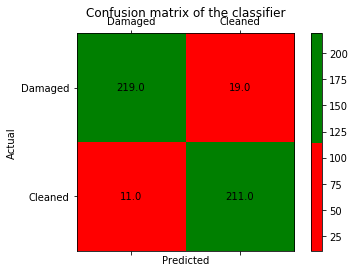

In [65]:
True_Positive = 0
True_Negative = 0
False_Positive = 0
False_Negative = 0
for i in range(len(y_test_nn)):
  if(y_test_nn[i]==1 and Y_test[i]==1):
    True_Positive += 1
  if(y_test_nn[i]==0 and Y_test[i]==0):
    True_Negative += 1
  if(y_test_nn[i]==1 and Y_test[i]==0):
    False_Positive += 1
  if(y_test_nn[i]==0 and Y_test[i]==1):
    False_Negative += 1

print(True_Positive,True_Negative,False_Positive,False_Negative)

Accuracy = (True_Positive + True_Negative) / (True_Positive + True_Negative + False_Positive + False_Negative) *100
print(f'Accuracy of the model is {Accuracy}')

C = confusion_matrix(y_test_nn, Y_test)  # doctest: +SKIP
#print(C) # doctest: +SKIP
fig = plt.figure()
ax = fig.add_subplot(111)
cmap = ListedColormap(['r', 'g'])
cax = ax.matshow(C,cmap = cmap)
for (i, j), z in np.ndenumerate(C):
    ax.text(j, i, '{:0.1f}'.format(z), ha='center', va='center')
labels = ['Damaged', 'Cleaned']
plt.title('Confusion matrix of the classifier')
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()